# Practical Questions : Assignment - Clustering #

### Q21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

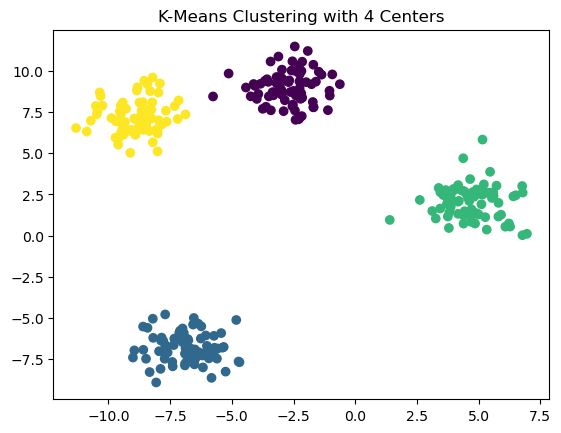

In [3]:
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["OMP_NUM_THREADS"] = "2"

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means Clustering with 4 Centers")
plt.show()


### Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3).fit(X)
print("First 10 predicted labels:", agg.labels_[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


### Q23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

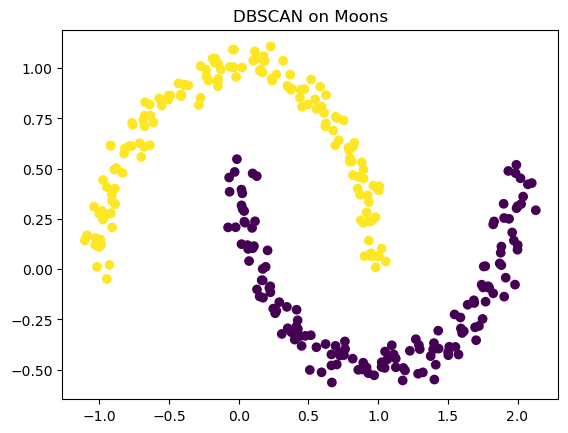

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.title("DBSCAN on Moons")
plt.show()

### Q24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("Cluster sizes:", np.bincount(kmeans.labels_))

Cluster sizes: [65 51 62]


### Q25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

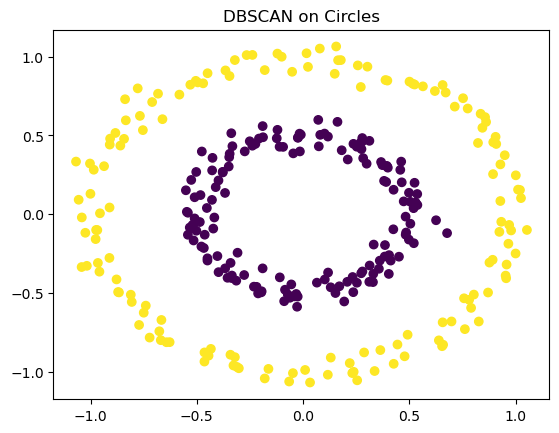

In [7]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.title("DBSCAN on Circles")
plt.show()

### Q26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


### Q27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

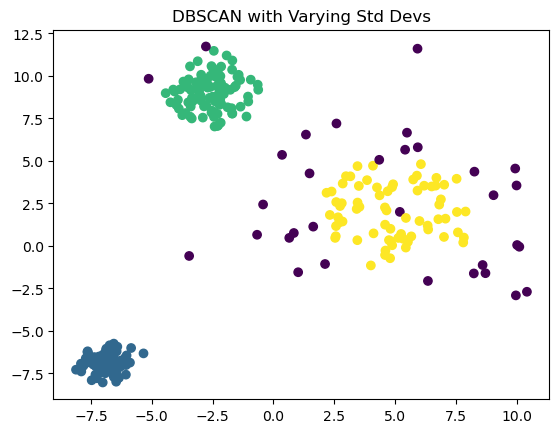

In [11]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.title("DBSCAN with Varying Std Devs")
plt.show()

### Q28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

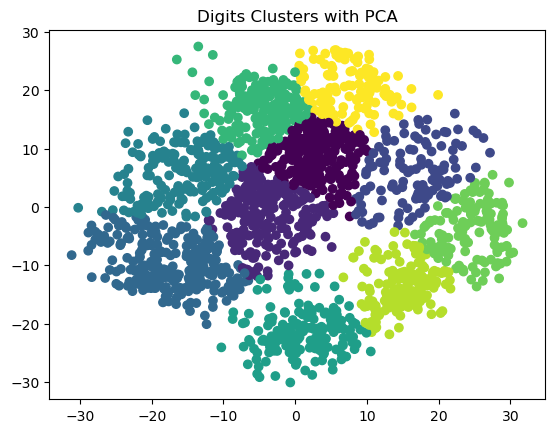

In [12]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("Digits Clusters with PCA")
plt.show()

### Q29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

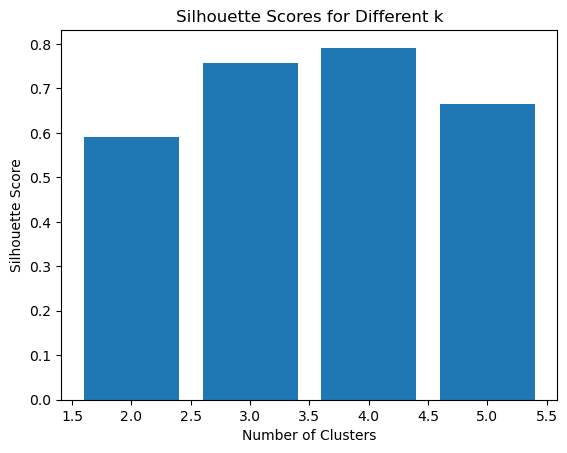

In [13]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.bar(range(2, 6), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

### Q30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

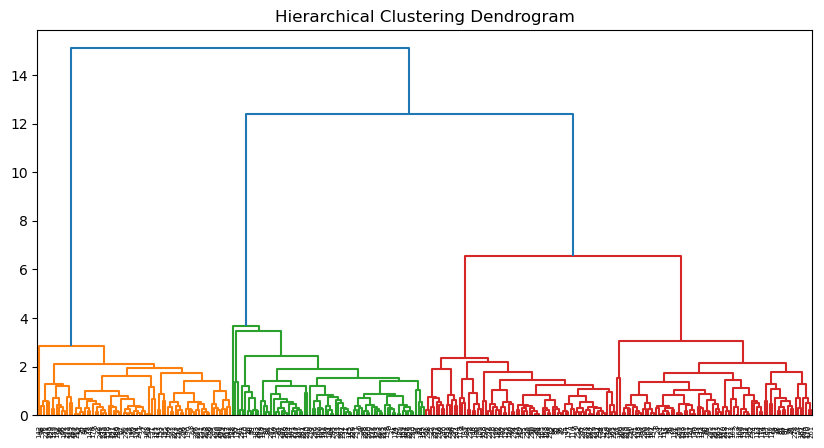

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

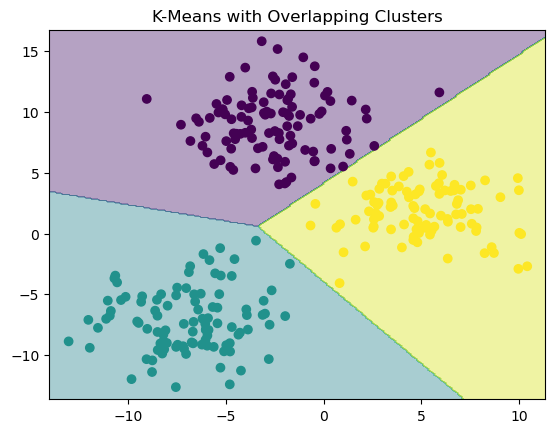

In [15]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means with Overlapping Clusters")
plt.show()

### Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

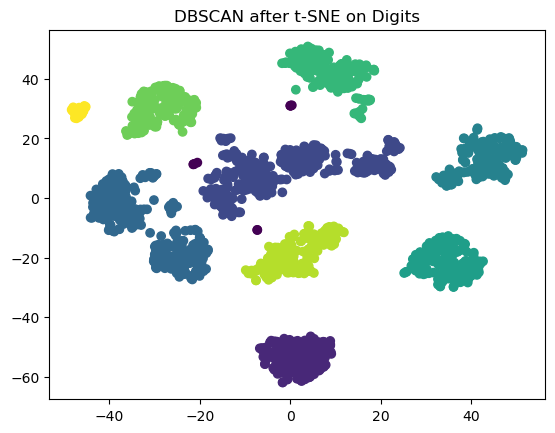

In [17]:
from sklearn.manifold import TSNE

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
db = DBSCAN(eps=5, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.title("DBSCAN after t-SNE on Digits")
plt.show()

### Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

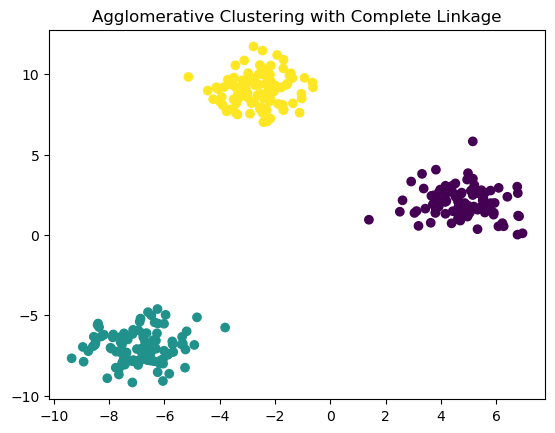

In [19]:
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()

### Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

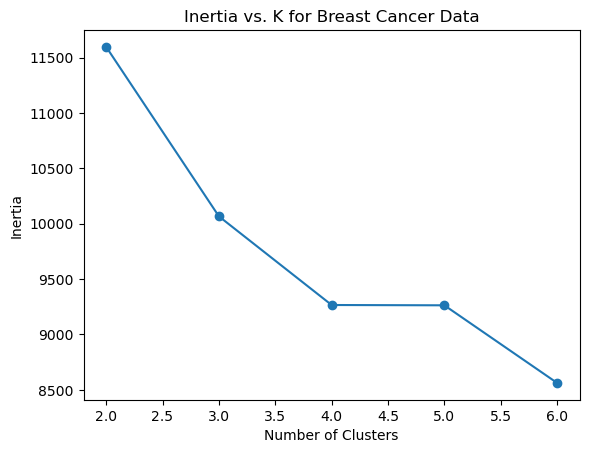

In [20]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
inertias = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("Inertia vs. K for Breast Cancer Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

### Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

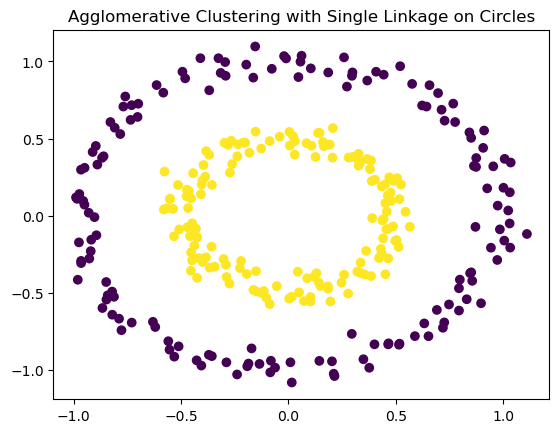

In [21]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering with Single Linkage on Circles")
plt.show()

### Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

In [22]:
X = StandardScaler().fit_transform(load_wine().data)
db = DBSCAN(eps=1.0, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


### Q37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

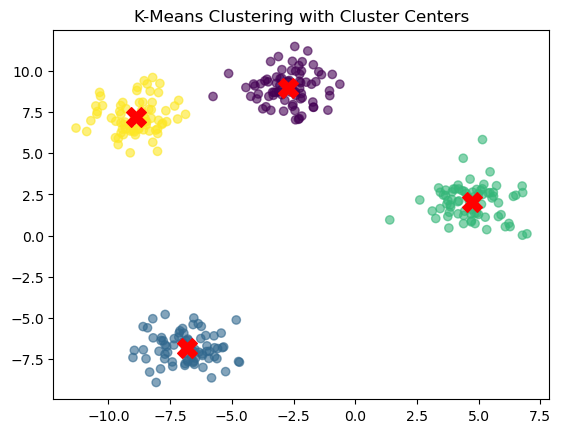

In [23]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.show()

### Q38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [24]:
X = StandardScaler().fit_transform(load_iris().data)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
n_noise = list(db.labels_).count(-1)
print("Number of noise samples:", n_noise)

Number of noise samples: 34


### Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

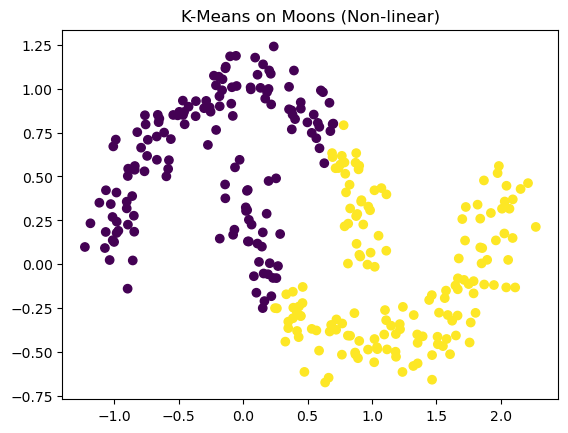

In [9]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means on Moons (Non-linear)")
plt.show()

### Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

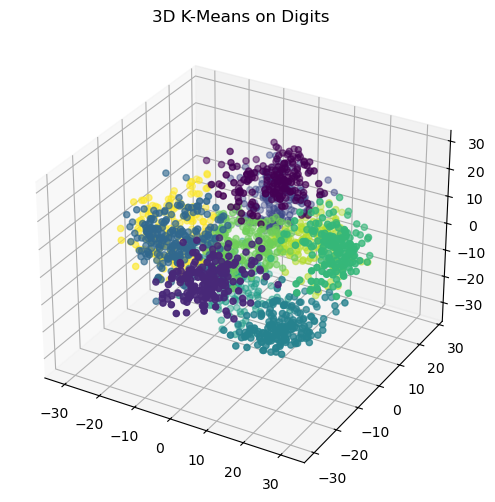

In [25]:
from mpl_toolkits.mplot3d import Axes3D

X = PCA(n_components=3).fit_transform(load_digits().data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
ax.set_title("3D K-Means on Digits")
plt.show()

Q41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

Silhouette Score: 0.678738720085253


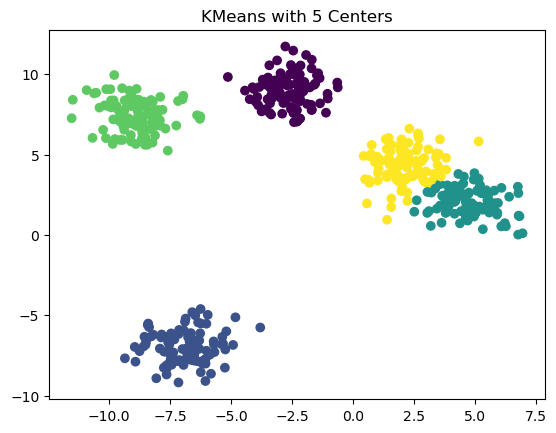

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("KMeans with 5 Centers")
plt.show()


Q42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

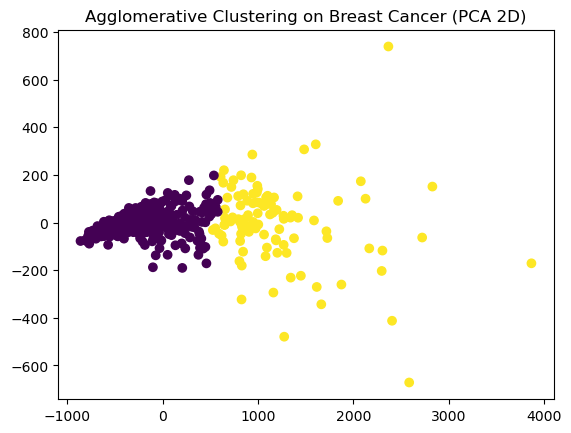

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = PCA(n_components=2).fit_transform(data.data)
agg = AgglomerativeClustering(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering on Breast Cancer (PCA 2D)")
plt.show()


Q43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

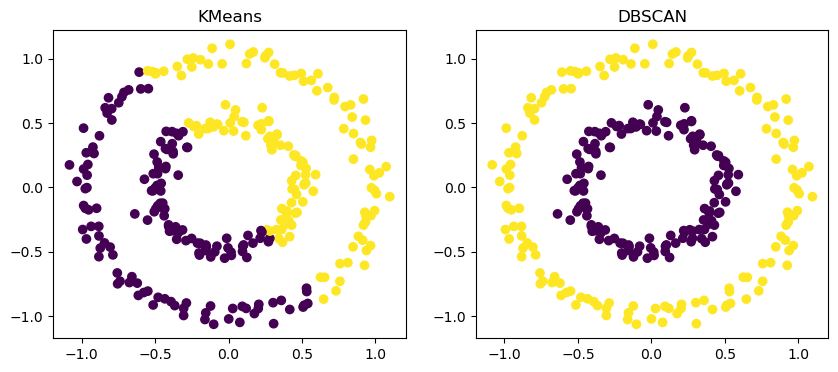

In [28]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("KMeans")
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=2).fit_predict(X))

plt.subplot(1, 2, 2)
plt.title("DBSCAN")
plt.scatter(X[:, 0], X[:, 1], c=DBSCAN(eps=0.2).fit_predict(X))
plt.show()


Q44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

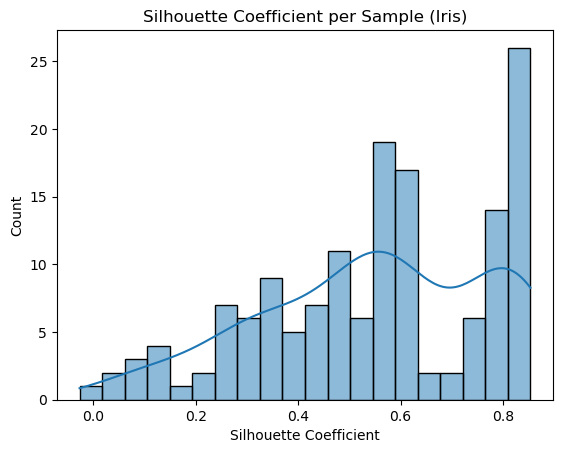

In [29]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import seaborn as sns

iris = load_iris()
X = iris.data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sil_samples = silhouette_samples(X, labels)

sns.histplot(sil_samples, bins=20, kde=True)
plt.title("Silhouette Coefficient per Sample (Iris)")
plt.xlabel("Silhouette Coefficient")
plt.show()


Q45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

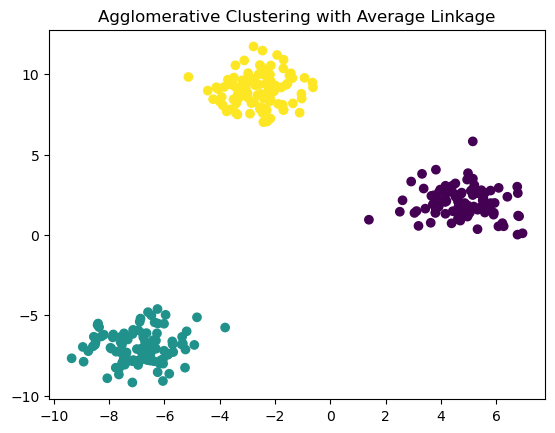

In [30]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()


Q46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

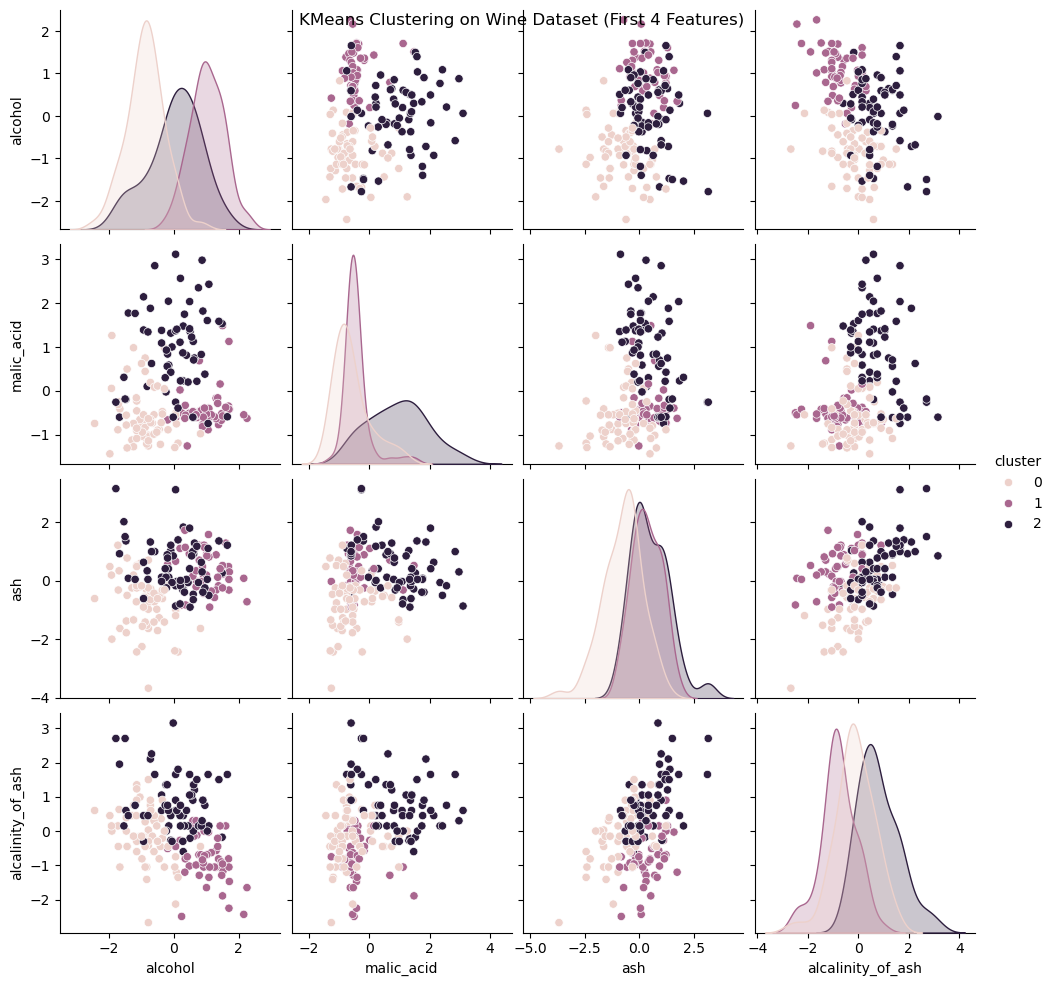

In [31]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data[:, :4])
df = pd.DataFrame(X, columns=wine.feature_names[:4])
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

sns.pairplot(df, hue='cluster')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)")
plt.show()


Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

Clusters: 3 | Noise Points: 35


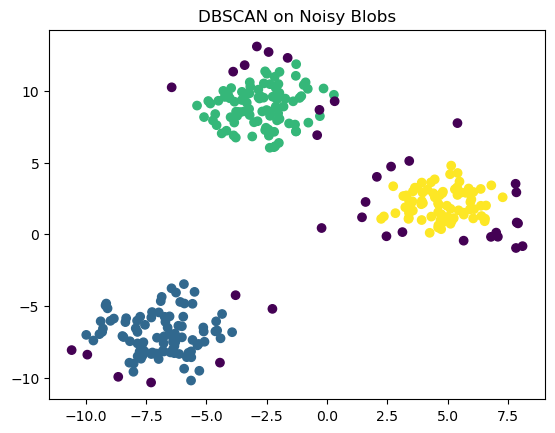

In [32]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Clusters:", n_clusters, "| Noise Points:", n_noise)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Noisy Blobs")
plt.show()


Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

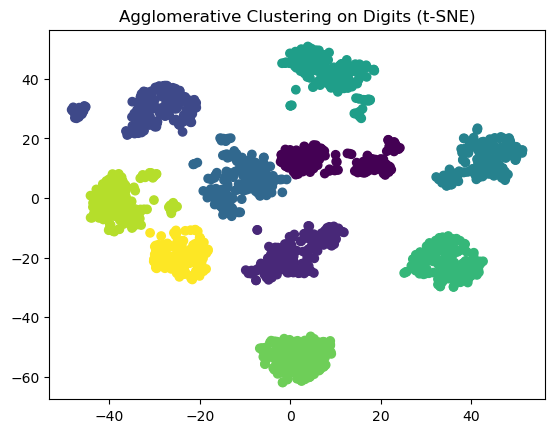

In [33]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
agg = AgglomerativeClustering(n_clusters=10).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()
